#WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
#List for holding lat_lngs and cities
Lat_lng = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)
cities[0]

'hilo'

In [5]:
Cities_Dict = {"City":cities,"Lat":"","Lng":"","MaxTemp":"","Humidity":"","Cloudiness":"","Wind Speed":"","Country":"","Date":""}
Cities_df = pd.DataFrame(Cities_Dict)
Cities_df

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,,,,,,,,
1,mataura,,,,,,,,
2,hermanus,,,,,,,,
3,ushuaia,,,,,,,,
4,norman wells,,,,,,,,
...,...,...,...,...,...,...,...,...,...
619,martinho campos,,,,,,,,
620,amuntai,,,,,,,,
621,paka,,,,,,,,
622,ocampo,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
record_number = 1
set_number = 1
print("Beginning data retrieval")
print("---------------------------------")
for index,row in Cities_df.iterrows():
    city = row['City']
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=Imperial"
    response = requests.get(url).json()
    try:
        print(f"Processing Record {record_number} of Set {set_number} | {city}")
        Cities_df.loc[index,"Lat"] = response["coord"]["lat"]
        Cities_df.loc[index,"Lng"] = response["coord"]["lon"]
        Cities_df.loc[index,"MaxTemp"] = response["main"]["temp_max"]
        Cities_df.loc[index,"Humidity"] = response["main"]["humidity"]
        Cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        Cities_df.loc[index,"Wind Speed"] = response["wind"]["speed"]
        Cities_df.loc[index,"Country"] = response["sys"]["country"]
        Cities_df.loc[index,"Date"] = response["dt"]
    except (KeyError,IndexError):
        print("City not found.Skipping......")
    record_number = record_number+1
    if record_number==51:
        set_number = set_number + 1
        record_number = 1
print("-------------------------")   
print("Data Retrieval Complete")
print("-------------------------")

Beginning data retrieval
---------------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | quelimane
Processing Record 7 of Set 1 | napoleon
Processing Record 8 of Set 1 | sao felix do xingu
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | guadalupe victoria
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | sungairaya
Processing Record 13 of Set 1 | sioux lookout
Processing Record 14 of Set 1 | henties bay
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | great malvern
Processing Record 17 of Set 1 | mitsamiouli
Processing Record 18 of Set 1 | okhotsk
Processing Record 19 of Set 1 | nyurba
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | makakilo city
Processing Record 22 of Set 1 | carnarvon
Processi

Processing Record 36 of Set 4 | victoria
Processing Record 37 of Set 4 | sri aman
Processing Record 38 of Set 4 | kalmunai
Processing Record 39 of Set 4 | meadow lake
Processing Record 40 of Set 4 | ankazoabo
Processing Record 41 of Set 4 | roma
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | bilibino
Processing Record 44 of Set 4 | alta floresta
Processing Record 45 of Set 4 | sorland
Processing Record 46 of Set 4 | wulanhaote
City not found.Skipping......
Processing Record 47 of Set 4 | port hardy
Processing Record 48 of Set 4 | grand river south east
City not found.Skipping......
Processing Record 49 of Set 4 | praia da vitoria
Processing Record 50 of Set 4 | vestmannaeyjar
Processing Record 1 of Set 5 | paamiut
Processing Record 2 of Set 5 | sychevka
Processing Record 3 of Set 5 | okato
Processing Record 4 of Set 5 | atambua
Processing Record 5 of Set 5 | dingle
Processing Record 6 of Set 5 | dawei
Processing Record 7 of Set 5 | itaituba
Processing Record 8 o

Processing Record 24 of Set 8 | goroka
Processing Record 25 of Set 8 | bereda
Processing Record 26 of Set 8 | qandala
Processing Record 27 of Set 8 | nador
Processing Record 28 of Set 8 | cabo san lucas
Processing Record 29 of Set 8 | bambous virieux
Processing Record 30 of Set 8 | haifa
Processing Record 31 of Set 8 | boca do acre
Processing Record 32 of Set 8 | boa esperanca
Processing Record 33 of Set 8 | hami
Processing Record 34 of Set 8 | griffith
Processing Record 35 of Set 8 | attawapiskat
City not found.Skipping......
Processing Record 36 of Set 8 | skalistyy
City not found.Skipping......
Processing Record 37 of Set 8 | qaqortoq
Processing Record 38 of Set 8 | nogliki
Processing Record 39 of Set 8 | taltal
Processing Record 40 of Set 8 | novyy urengoy
Processing Record 41 of Set 8 | saint-leu
Processing Record 42 of Set 8 | isla vista
Processing Record 43 of Set 8 | samarai
Processing Record 44 of Set 8 | indramayu
Processing Record 45 of Set 8 | grindavik
Processing Record 46

Processing Record 8 of Set 12 | santa fe
Processing Record 9 of Set 12 | puerto rico
Processing Record 10 of Set 12 | pandan
Processing Record 11 of Set 12 | kutum
Processing Record 12 of Set 12 | acarau
Processing Record 13 of Set 12 | luderitz
Processing Record 14 of Set 12 | champerico
Processing Record 15 of Set 12 | axim
Processing Record 16 of Set 12 | dudinka
Processing Record 17 of Set 12 | mobaye
Processing Record 18 of Set 12 | tra vinh
Processing Record 19 of Set 12 | prince george
Processing Record 20 of Set 12 | dunedin
Processing Record 21 of Set 12 | mount isa
Processing Record 22 of Set 12 | vangaindrano
Processing Record 23 of Set 12 | amalapuram
Processing Record 24 of Set 12 | huixtla
Processing Record 25 of Set 12 | fukuma
Processing Record 26 of Set 12 | husavik
Processing Record 27 of Set 12 | bojnurd
Processing Record 28 of Set 12 | hollola
Processing Record 29 of Set 12 | sayyan
Processing Record 30 of Set 12 | verkhnyaya inta
Processing Record 31 of Set 12 | tr

In [7]:
Cities_df

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,80.6,57,1,6.93,US,1595997127
1,mataura,-46.19,168.86,49.6,72,100,5.68,NZ,1595997128
2,hermanus,-34.42,19.23,42.01,96,0,1.01,ZA,1595997128
3,ushuaia,-54.8,-68.3,37.4,69,40,13.87,AR,1595996897
4,norman wells,65.28,-126.83,57.2,100,90,8.05,CA,1595997129
...,...,...,...,...,...,...,...,...,...
619,martinho campos,-19.33,-45.24,62.62,63,0,3.47,BR,1595997295
620,amuntai,-2.42,115.25,94.57,41,50,1.52,ID,1595997094
621,paka,4.64,103.44,89.6,66,20,6.93,MY,1595997296
622,ocampo,21.65,-101.5,57.88,91,100,16.58,MX,1595997296


In [8]:
Cities_Weather = Cities_df.replace('', np.nan)   #Replacing the null values with NaN

In [9]:
Cities_Weather.dropna(inplace=True) #Dropping the null values

In [10]:
New = Cities_Weather.isnull() #Checked for any null values left in the data frame

In [11]:
New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 623
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   City        570 non-null    bool 
 1   Lat         570 non-null    bool 
 2   Lng         570 non-null    bool 
 3   MaxTemp     570 non-null    bool 
 4   Humidity    570 non-null    bool 
 5   Cloudiness  570 non-null    bool 
 6   Wind Speed  570 non-null    bool 
 7   Country     570 non-null    bool 
 8   Date        570 non-null    bool 
dtypes: bool(9)
memory usage: 9.5 KB


In [12]:
Cities_Weather

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,80.60,57.0,1.0,6.93,US,1.595997e+09
1,mataura,-46.19,168.86,49.60,72.0,100.0,5.68,NZ,1.595997e+09
2,hermanus,-34.42,19.23,42.01,96.0,0.0,1.01,ZA,1.595997e+09
3,ushuaia,-54.80,-68.30,37.40,69.0,40.0,13.87,AR,1.595997e+09
4,norman wells,65.28,-126.83,57.20,100.0,90.0,8.05,CA,1.595997e+09
...,...,...,...,...,...,...,...,...,...
619,martinho campos,-19.33,-45.24,62.62,63.0,0.0,3.47,BR,1.595997e+09
620,amuntai,-2.42,115.25,94.57,41.0,50.0,1.52,ID,1.595997e+09
621,paka,4.64,103.44,89.60,66.0,20.0,6.93,MY,1.595997e+09
622,ocampo,21.65,-101.50,57.88,91.0,100.0,16.58,MX,1.595997e+09


In [13]:
Cities_Weather.to_csv("Output.csv") #Saved the data in an output file

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.

In [15]:
Cities_Weather.loc[Cities_Weather["Humidity"]>100]  #Skipped the steps after this as there are no cities that have humidity > 100%

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs

## Latitude vs. Temperature Plot

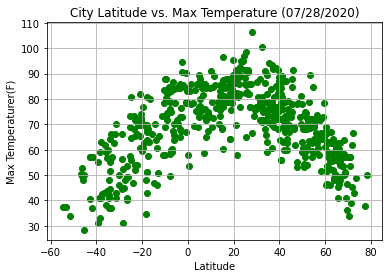

In [41]:
x_axis = Cities_Weather["Lat"]
y_axis = Cities_Weather["MaxTemp"]
plt.scatter(x_axis,y_axis,marker="o",color="green")
plt.xlabel("Latitude")
plt.ylabel("Max Temperaturer(F)")
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m/%d/%Y")})')  #Refrence for getting current date : https://docs.python.org/3/library/time.html#time.strftime
plt.grid()
plt.savefig("Output/Latitude vs. Max Temperature.jpeg")

## Latitude vs. Humidity Plot

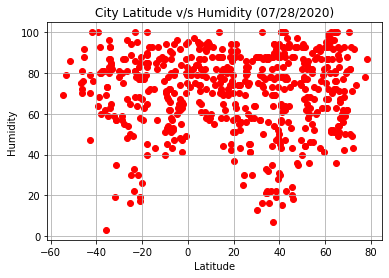

In [17]:
x_axis = Cities_Weather["Lat"]
y_axis = Cities_Weather["Humidity"]
plt.scatter(x_axis,y_axis,marker="o",color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f'City Latitude v/s Humidity ({time.strftime("%m/%d/%Y")})')
plt.grid()
plt.savefig("Output/Latitude vs. Humidity.jpeg")

## Latitude vs. Cloudiness Plot

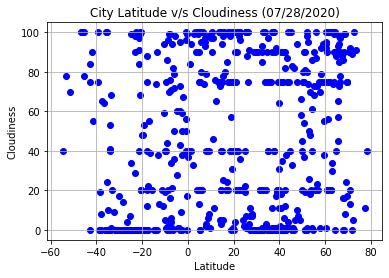

In [18]:
x_axis = Cities_Weather["Lat"]
y_axis = Cities_Weather["Cloudiness"]
plt.scatter(x_axis,y_axis,marker="o",color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f'City Latitude v/s Cloudiness ({time.strftime("%m/%d/%Y")})')
plt.grid()
plt.savefig("Output/Latitude vs. Cloudiness.jpeg")

## Latitude vs. Wind Speed Plot

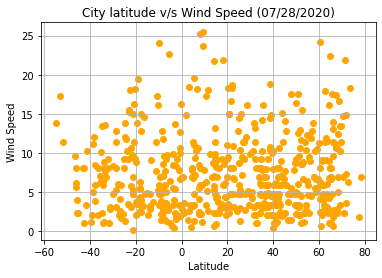

In [19]:
x_axis = Cities_Weather["Lat"]
y_axis = Cities_Weather["Wind Speed"]
plt.scatter(x_axis,y_axis,marker='o',color='orange')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f'City latitude v/s Wind Speed ({time.strftime("%m/%d/%Y")})')
plt.grid()
plt.savefig("Output/Latitude vs. WindSpeed.jpeg")

## Linear Regression

 ### Created Northern and Southern Hemisphere DataFrames

### Run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

In [20]:
Northern_Hemisphere = Cities_Weather.loc[Cities_Weather["Lat"]>=0]

In [21]:
Northern_Hemisphere

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,80.60,57.0,1.0,6.93,US,1.595997e+09
4,norman wells,65.28,-126.83,57.20,100.0,90.0,8.05,CA,1.595997e+09
6,napoleon,41.39,-84.13,71.60,100.0,1.0,4.70,US,1.595997e+09
8,bethel,41.37,-73.41,71.60,83.0,75.0,3.36,US,1.595997e+09
9,guadalupe victoria,32.29,-115.11,100.40,16.0,1.0,11.41,MX,1.595997e+09
...,...,...,...,...,...,...,...,...,...
616,campbell river,50.02,-125.24,63.00,82.0,20.0,2.21,CA,1.595997e+09
618,hobyo,5.35,48.53,80.02,71.0,0.0,19.53,SO,1.595997e+09
621,paka,4.64,103.44,89.60,66.0,20.0,6.93,MY,1.595997e+09
622,ocampo,21.65,-101.50,57.88,91.0,100.0,16.58,MX,1.595997e+09


In [22]:
Southern_Hemisphere = Cities_Weather.loc[Cities_Weather["Lat"]<0]
Southern_Hemisphere

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,Wind Speed,Country,Date
1,mataura,-46.19,168.86,49.60,72.0,100.0,5.68,NZ,1.595997e+09
2,hermanus,-34.42,19.23,42.01,96.0,0.0,1.01,ZA,1.595997e+09
3,ushuaia,-54.80,-68.30,37.40,69.0,40.0,13.87,AR,1.595997e+09
5,quelimane,-17.88,36.89,63.77,90.0,20.0,4.00,MZ,1.595997e+09
7,sao felix do xingu,-6.64,-51.99,67.37,52.0,0.0,1.23,BR,1.595997e+09
...,...,...,...,...,...,...,...,...,...
608,sibiti,-3.68,13.35,64.98,92.0,73.0,3.38,CG,1.595997e+09
611,kaniama,-7.57,24.18,59.85,51.0,34.0,3.15,CD,1.595997e+09
614,santiago de cao,-7.96,-79.24,58.50,91.0,16.0,7.05,PE,1.595997e+09
619,martinho campos,-19.33,-45.24,62.62,63.0,0.0,3.47,BR,1.595997e+09


#### Created a function to create Linear Regression plots

In [34]:
def Regression( x_values,y_values):                   #function definition
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values*slope+intercept
    line_eq = "y=" +str(round(slope,2)) + "x+" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),(min(y_values)+20)),fontsize=20,color="red")   #defining attributes of the regression line
    print(f"The r-squared is : {rvalue**2}")
    return

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.4506714898609356


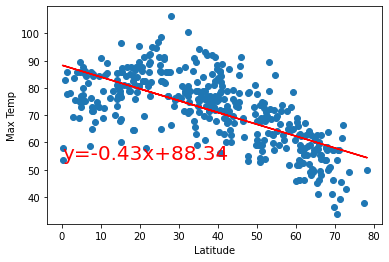

In [35]:
x_axis = Northern_Hemisphere["Lat"]
y_axis = Northern_Hemisphere["MaxTemp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
Regression(x_axis,y_axis)
plt.savefig("Output/Regression Output/NH Temp vs.Latitude.jpeg")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5163796678326396


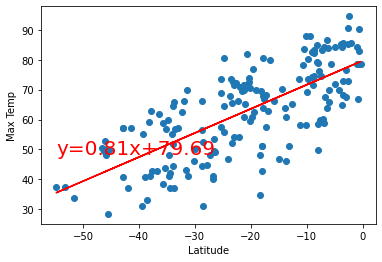

In [36]:
x_axis = Southern_Hemisphere["Lat"]
y_axis = Southern_Hemisphere["MaxTemp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
Regression(x_axis,y_axis)
plt.savefig("Output/Regression Output/SH Temp vs.Latitude.jpeg")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.0020972868761571805


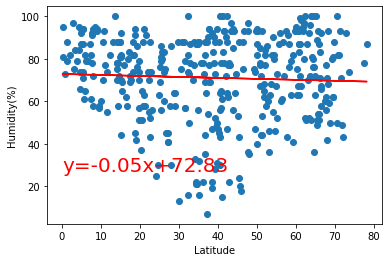

In [37]:
x_axis = Northern_Hemisphere["Lat"]
y_axis = Northern_Hemisphere["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
Regression(x_axis,y_axis)
plt.savefig("Output/Regression Output/NH Humidity vs.Latitude.jpeg")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.006336453445051897


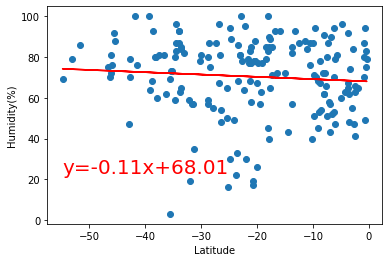

In [38]:
x_axis = Southern_Hemisphere["Lat"]
y_axis = Southern_Hemisphere["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
Regression(x_axis,y_axis)
plt.savefig("Output/Regression Output/SH Humidity vs.Latitude.jpeg")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.0014602639519506544


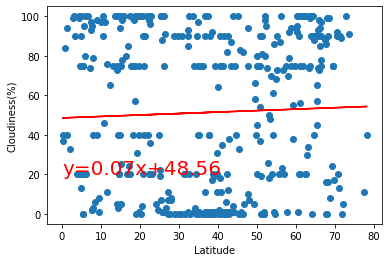

In [39]:
x_axis = Northern_Hemisphere["Lat"]
y_axis = Northern_Hemisphere["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
Regression(x_axis,y_axis)
plt.savefig("Output/Regression Output/NH Cloudiness vs.Latitude.jpeg")

Analysis:
This plot shows that there is very little correlation between the dependent and independent variable. i.e. Cloudiness & Latitude.Cloudiness follow its own trend and we see that many of the data points are aligned along the same line throughout the altitude range in the Northern Hemisphere .For ex: along 0,20,40,80 and max at 100 the data points are more dense and in uniformity along the same line.So latitude does not have anything to do with it.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 4.426477429595458e-05


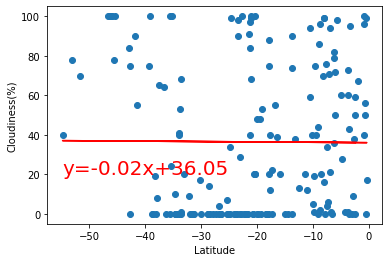

In [40]:
x_axis = Southern_Hemisphere["Lat"]
y_axis = Southern_Hemisphere["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
Regression(x_axis,y_axis)
plt.savefig("Output/Regression Output/SH Cloudiness vs.Latitude.jpeg")

In this plot too we see that there is almost no correlation between the two variables and the coefficient of determination is as low as 0.004% and the data points are scattered throughout .We can say that the movement of the cloudiness can not be justified by latitude.But,many of the cities have 0% cloudiness in the Southern Hemisphere at this point of time.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.000198289328423177


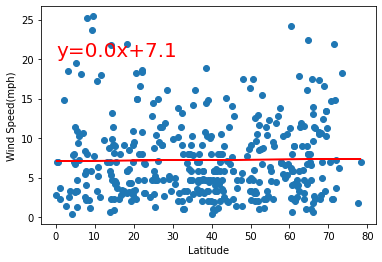

In [30]:
x_axis = Northern_Hemisphere["Lat"]
y_axis = Northern_Hemisphere["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
Regression(x_axis,y_axis)
plt.savefig("Output/Regression Output/NH WindSpeed vs.Latitude.jpeg")

One of the trend that is noticeable here is that most if the data points are under the regression line and they mostly lie in the range of windspeed that lies between 0 to 5(mph).This may be due to the seasonal weather changes in the northern hemisphere.Also the r squared value is as low as 0.019% which quite explains that movement of the windpeed is mot explained by the movement of latitude here.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.001380626059997825


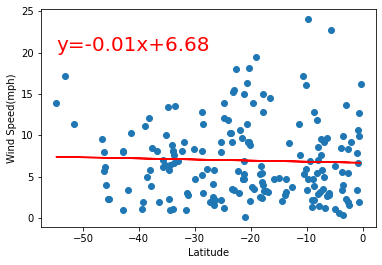

In [31]:
x_axis = Southern_Hemisphere["Lat"]
y_axis = Southern_Hemisphere["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
Regression(x_axis,y_axis)
plt.savefig("Output/Regression Output/SH WindSpeed vs.Latitude.jpeg")

Southern hemisphere has even low coeffiicient of determination value.But the slope here is negative .So they are  negatively related with a slope of as low as -0.01 .So there is a very  very little inverse correlation between the two variables. But the Wind speed for most of the cities lie bewteen 0 to 17.